In [73]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

data =pd.read_csv('mnist_test.csv')

In [74]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data)

data_test=data[0:1000].T
Y_test=data_test[0]
X_test=data_test[1:n]
X_test=X_test/255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train/ 255.
_,m_train = X_train.shape

print(Y_train.size)

9000


In [75]:
def init_parameter():
    W1=np.random.rand(10,784)-0.5
    b1=np.random.rand(10,1)-0.5
    W2=np.random.rand(10,10)-0.5
    b2=np.random.rand(10,1)-0.5
    return W1,b1,W2,b2

def ReLu(Z):
    return np.maximum(Z,0)

def softmax(Z):
    A=np.exp(Z)/sum(np.exp(Z))
    return A

def fwd_prop(X,W1,b1,W2,b2):
    Z1=W1.dot(X)+b1
    A1=ReLu(Z1)
    Z2=W2.dot(A1)+b2
    A2=softmax(Z2)
    return Z1,A1,Z2,A2
    
def Relu_deriv(Z):
    return Z>0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    return one_hot_Y.transpose()
    

def bck_prop(X,Y,Z1,A1,Z2,A2,W1,W2):
    # one_hot_Y=one_hot(Y)
    # Diff=A2-one_hot_Y
    # # Cost=np.sum(np.square(Diff))
    # dz2=(Diff)*2*Relu_deriv(Z2)
    # dw2=1/m * dz2.dot(A1.T)
    # db2 = np.sum(dz2, axis=1, keepdims=True) / m
    # dz1=W2.T.dot(dz2)*Relu_deriv(Z1)
    # dw1=dz1.dot(X.T) * 1/m
    # db1=np.sum(dz1, axis=1, keepdims=True) / m
    # return dw1,db1,dw2,db2
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dw2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * Relu_deriv(Z1)
    dw1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dw1, db1, dw2, db2

def update_params(W1, b1, W2, b2, dw1, db1, dw2, db2, alpha):
    W1 = W1 - alpha * dw1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dw2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2
    

In [76]:
def give_predictions(A2):
    return np.argmax(A2,0)

def get_accuracy(prediction,Y):
    print(f"heres my prediction={prediction}, actual{Y}")
    return np.sum(prediction==Y)/Y.size

def gradient_descent(X,Y,alpha,iteration):
    W1,b1,W2,b2=init_parameter()
    for i in range (iteration):
        Z1,A1,Z2,A2=fwd_prop(X,W1,b1,W2,b2)
        dw1,db1,dw2,db2=bck_prop(X,Y,Z1,A1,Z2,A2,W1,W2)
        W1, b1, W2, b2=update_params(W1, b1, W2, b2, dw1, db1, dw2, db2, alpha)
        if i%500 ==0 :
            predictions=give_predictions(A2)
            print(f"Accuracy at iteration {i}: {get_accuracy(predictions, Y)}")
            
    return W1,b1,W2,b2


In [77]:
W1,b1,W2,b2=gradient_descent(X_train,Y_train,0.4,5000)

heres my prediction=[0 3 0 ... 0 3 0], actual[5 2 0 ... 5 1 7]
Accuracy at iteration 0: 0.12088888888888889
heres my prediction=[5 2 0 ... 5 1 7], actual[5 2 0 ... 5 1 7]
Accuracy at iteration 500: 0.9137777777777778
heres my prediction=[5 2 0 ... 5 1 7], actual[5 2 0 ... 5 1 7]
Accuracy at iteration 1000: 0.9388888888888889
heres my prediction=[5 2 0 ... 5 1 7], actual[5 2 0 ... 5 1 7]
Accuracy at iteration 1500: 0.9514444444444444
heres my prediction=[5 2 0 ... 5 1 7], actual[5 2 0 ... 5 1 7]
Accuracy at iteration 2000: 0.9594444444444444
heres my prediction=[5 2 0 ... 5 1 7], actual[5 2 0 ... 5 1 7]
Accuracy at iteration 2500: 0.9673333333333334
heres my prediction=[5 2 0 ... 5 1 7], actual[5 2 0 ... 5 1 7]
Accuracy at iteration 3000: 0.9723333333333334
heres my prediction=[5 2 0 ... 5 1 7], actual[5 2 0 ... 5 1 7]
Accuracy at iteration 3500: 0.9686666666666667
heres my prediction=[5 2 0 ... 5 1 7], actual[5 2 0 ... 5 1 7]
Accuracy at iteration 4000: 0.9823333333333333
heres my pred

In [78]:
def make_prediction(X, W1, b1, W2, b2):
    _,_,_,A2=fwd_prop(X,W1,b1,W2,b2)
    return give_predictions(A2)

def test_prediction(index, W1, b1, W2, b2):
    current_img=X_test[: ,index,None]
    prediction=make_prediction(current_img, W1, b1, W2, b2)
    label=Y_test[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    current_img=current_img.reshape((28,28))*255
    plt.gray()
    plt.imshow(current_img, interpolation='nearest')
    plt.show()

Prediction:  [0]
Label:  0


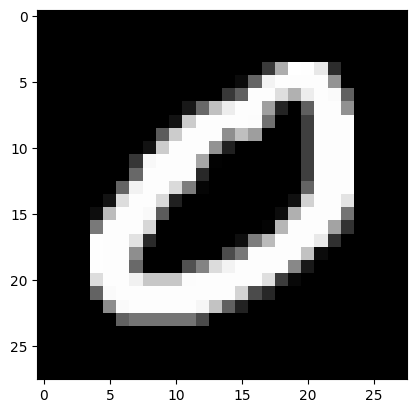

Prediction:  [7]
Label:  7


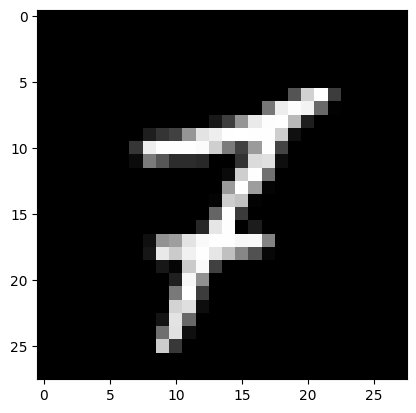

Prediction:  [9]
Label:  4


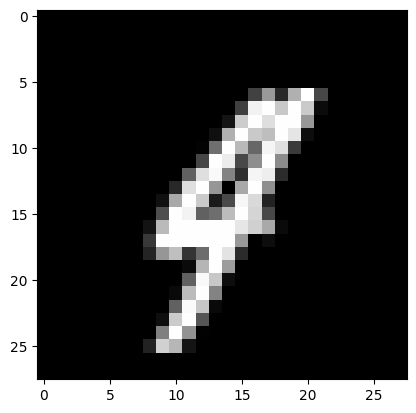

Prediction:  [3]
Label:  3


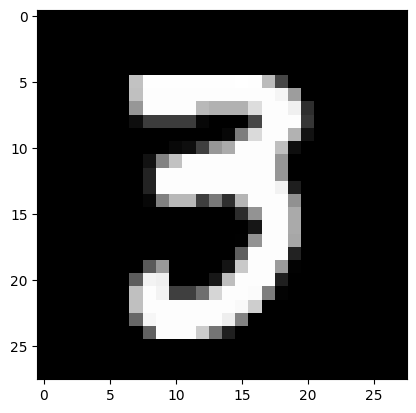

In [79]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

In [80]:
dev_predictions = make_prediction(X_test, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_test)

heres my prediction=[0 7 9 3 7 1 1 7 1 5 1 2 7 0 6 0 4 0 8 8 4 2 6 9 4 7 2 1 8 2 7 7 6 1 4 2 9
 1 1 0 8 8 2 4 8 3 0 9 9 6 8 4 3 4 9 2 3 2 5 4 6 6 8 0 5 5 1 4 9 4 5 6 1 6
 0 8 1 0 8 1 4 3 7 1 2 0 4 7 9 9 7 3 2 4 1 8 0 0 1 1 7 8 9 7 1 1 9 1 1 4 0
 9 2 0 7 7 1 5 1 3 0 2 9 2 1 3 6 1 7 2 3 2 1 5 0 3 8 4 0 0 5 8 1 6 3 0 4 4
 6 3 2 9 2 9 7 8 1 9 9 6 0 3 2 7 2 6 9 1 9 2 2 5 6 9 6 3 0 9 5 3 0 4 9 4 7
 9 1 3 3 0 7 5 8 5 6 3 7 7 7 0 8 7 5 6 2 8 6 0 7 7 8 1 6 5 5 1 5 7 3 1 7 0
 5 1 0 5 5 8 3 8 7 7 9 3 9 2 2 6 3 9 3 0 8 0 6 1 5 0 0 2 9 8 1 0 6 2 5 9 7
 4 5 0 9 9 4 7 9 0 1 9 7 3 0 8 8 5 5 5 1 4 9 7 7 8 8 2 9 2 7 5 9 2 7 1 2 6
 9 6 8 5 7 8 0 3 5 7 8 4 4 8 4 9 5 0 7 9 7 0 1 7 0 1 9 3 8 7 1 7 3 9 6 9 7
 1 8 7 6 0 7 5 9 3 4 8 2 1 2 7 2 7 4 2 3 8 9 1 1 7 6 3 5 9 7 7 0 1 0 6 7 6
 4 6 3 7 9 9 8 6 2 4 5 1 8 0 6 4 0 1 7 9 6 3 0 6 0 4 1 0 1 8 8 8 6 1 0 5 9
 0 2 5 2 2 3 4 7 7 4 9 4 4 6 2 5 0 5 3 1 5 4 4 7 1 3 2 5 6 5 6 7 5 0 3 0 7
 9 8 0 2 4 2 5 9 2 1 1 2 2 1 2 9 6 5 0 1 2 6 1 3 6 8 6 9 6 3 6 8 2 5 6 1 5
 9 2 

np.float64(0.902)